In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

In [22]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [24]:
df.rename(columns={'instant':'rec_id',
                         'dteday':'datetime',
                         'holiday':'is_holiday',
                         'workingday':'is_workingday',
                         'weathersit':'weather_condition',
                         'hum':'humidity',
                         'mnth':'month',
                         'cnt':'total_count',
                         'hr':'hour',
                         'yr':'year'},inplace=True)

In [25]:
# date time conversion
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

[Text(0.5,1,'Season wise hourly distribution of counts')]

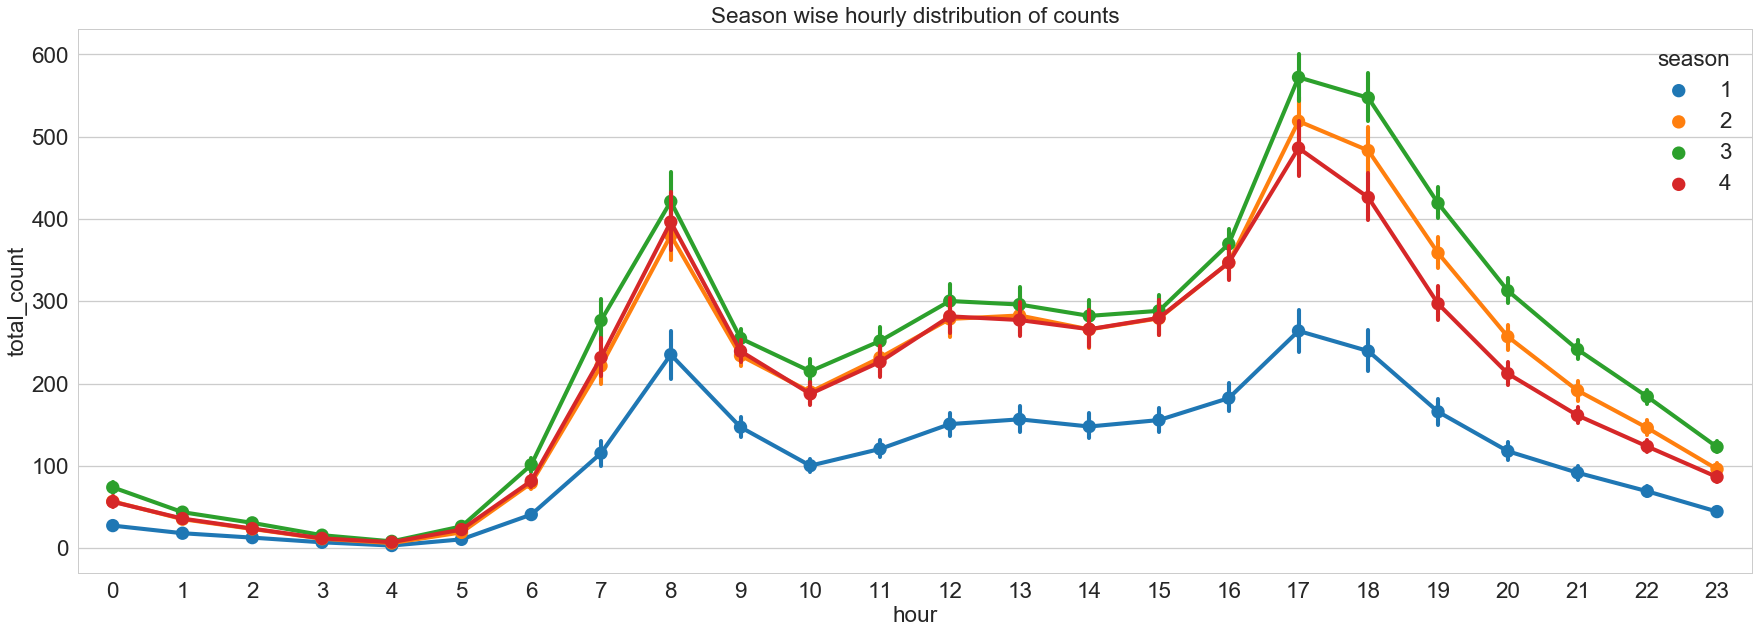

In [27]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['hour',
                            'total_count',
                            'season']],
             x='hour',y='total_count',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5,1,'Weekday wise hourly distribution of counts')]

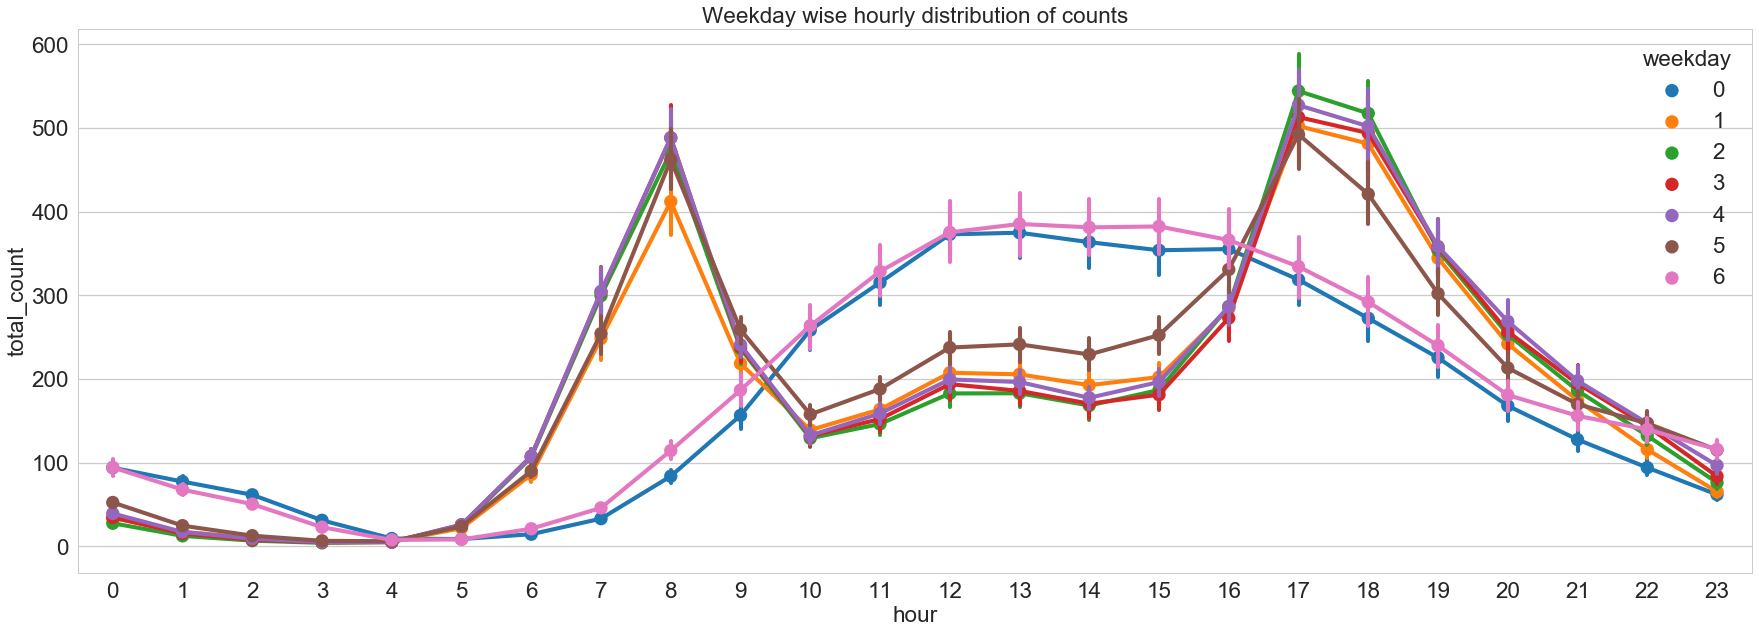

In [28]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['hour',
                            'total_count',
                            'weekday']],
             x='hour',y='total_count',
             hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5,1,'Monthly distribution of counts')]

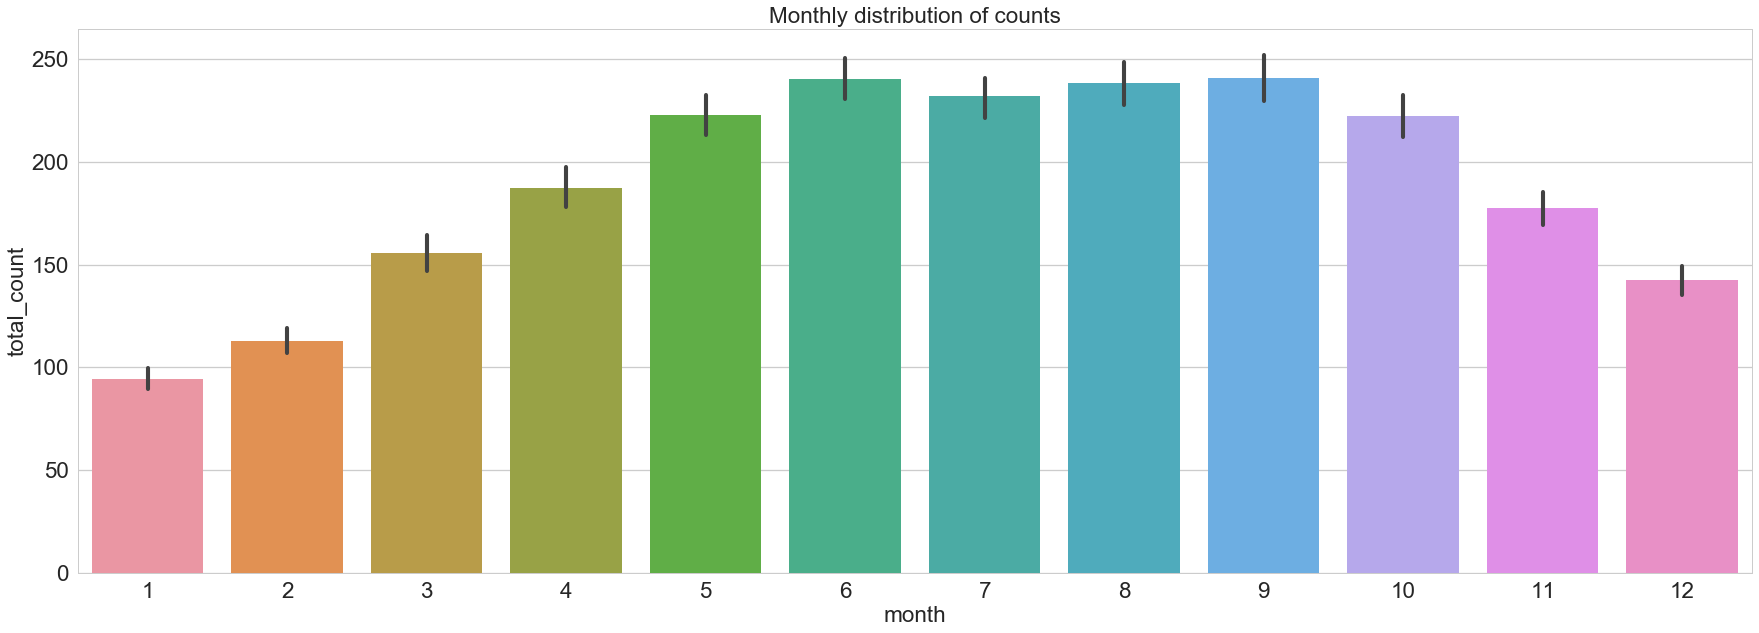

In [29]:
fig,ax = plt.subplots()
sn.barplot(data=df[['month',
                         'total_count']],
            x="month",y="total_count")
ax.set(title="Monthly distribution of counts")

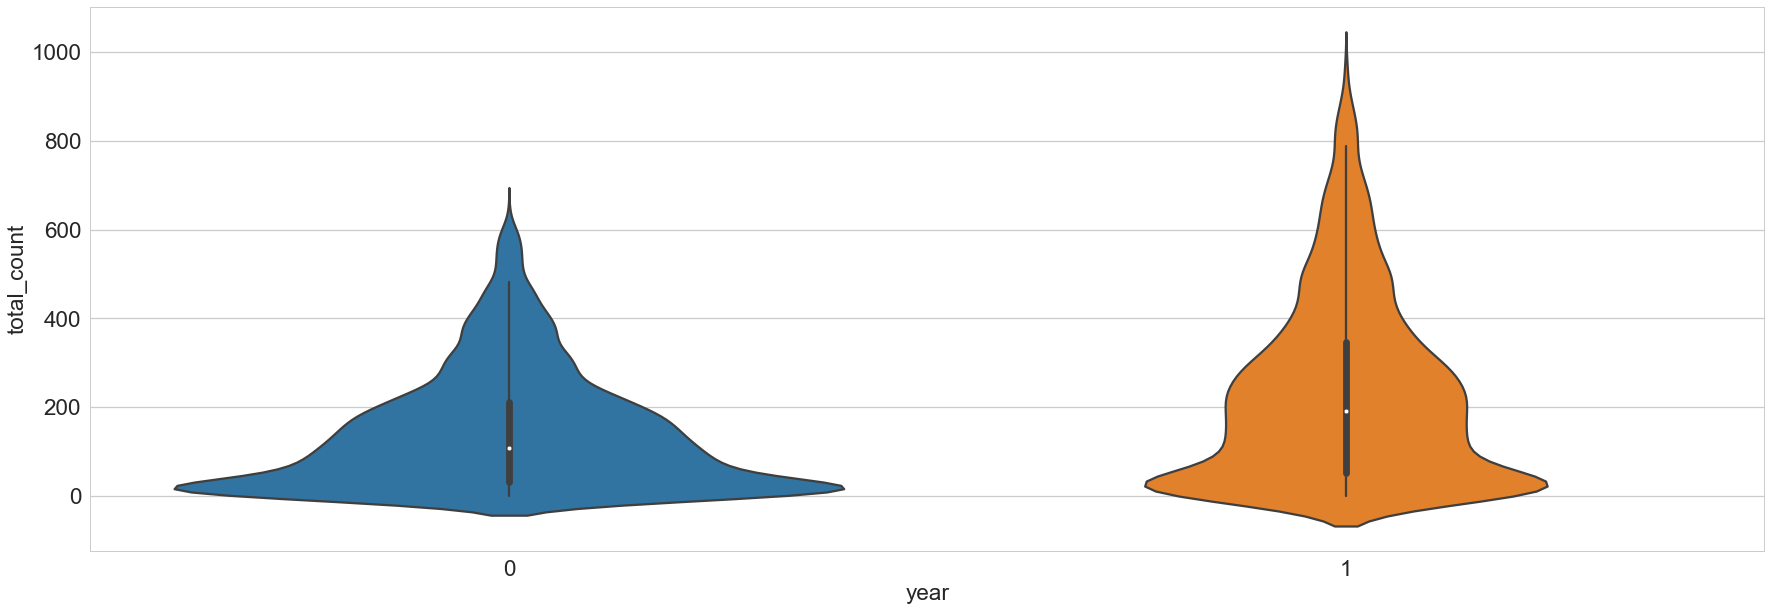

In [30]:
sn.violinplot(data=df[['year',
                            'total_count']],
              x="year",y="total_count")

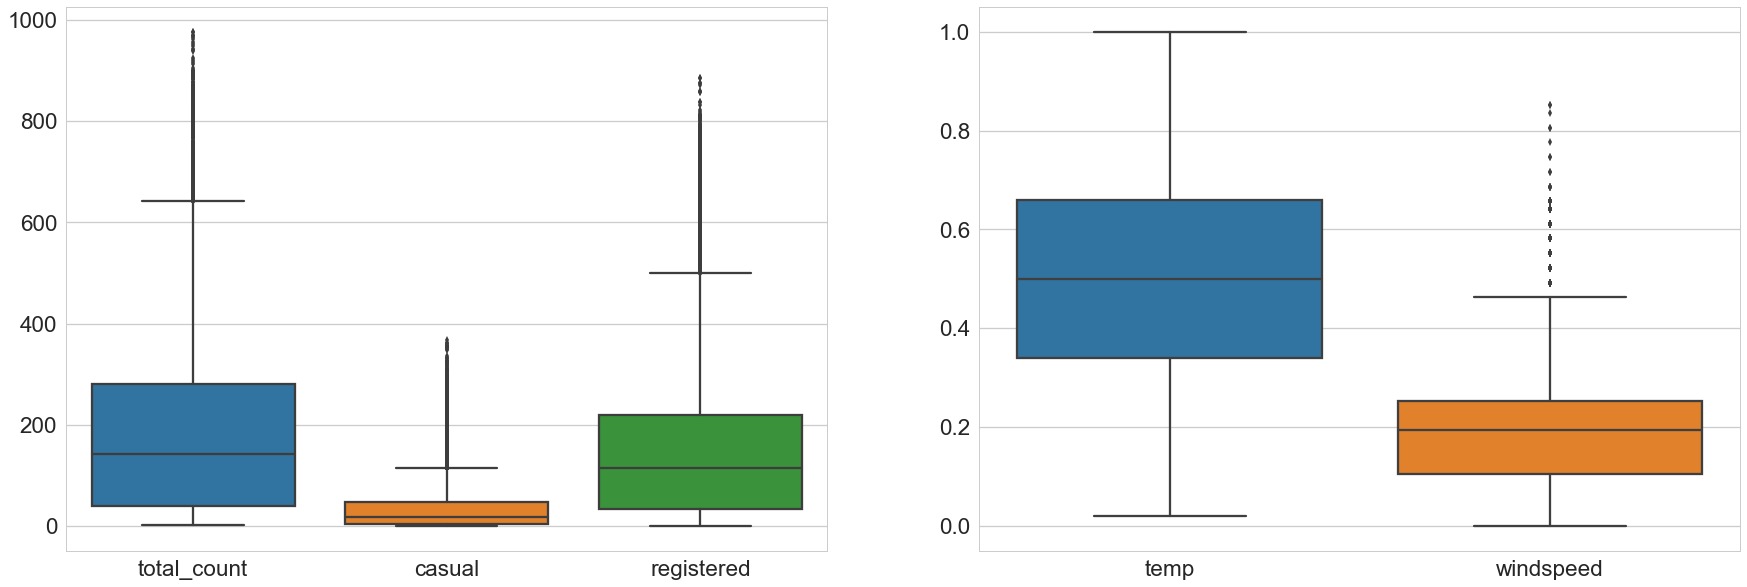

In [31]:
# Finding the outliers
fig,(ax1,ax2)= plt.subplots(ncols=2)
sn.boxplot(data=df[['total_count',
                         'casual','registered']],ax=ax1)
sn.boxplot(data=df[['temp','windspeed']],ax=ax2)

[Text(0.5,1,'Box Pot for hourly distribution of counts')]

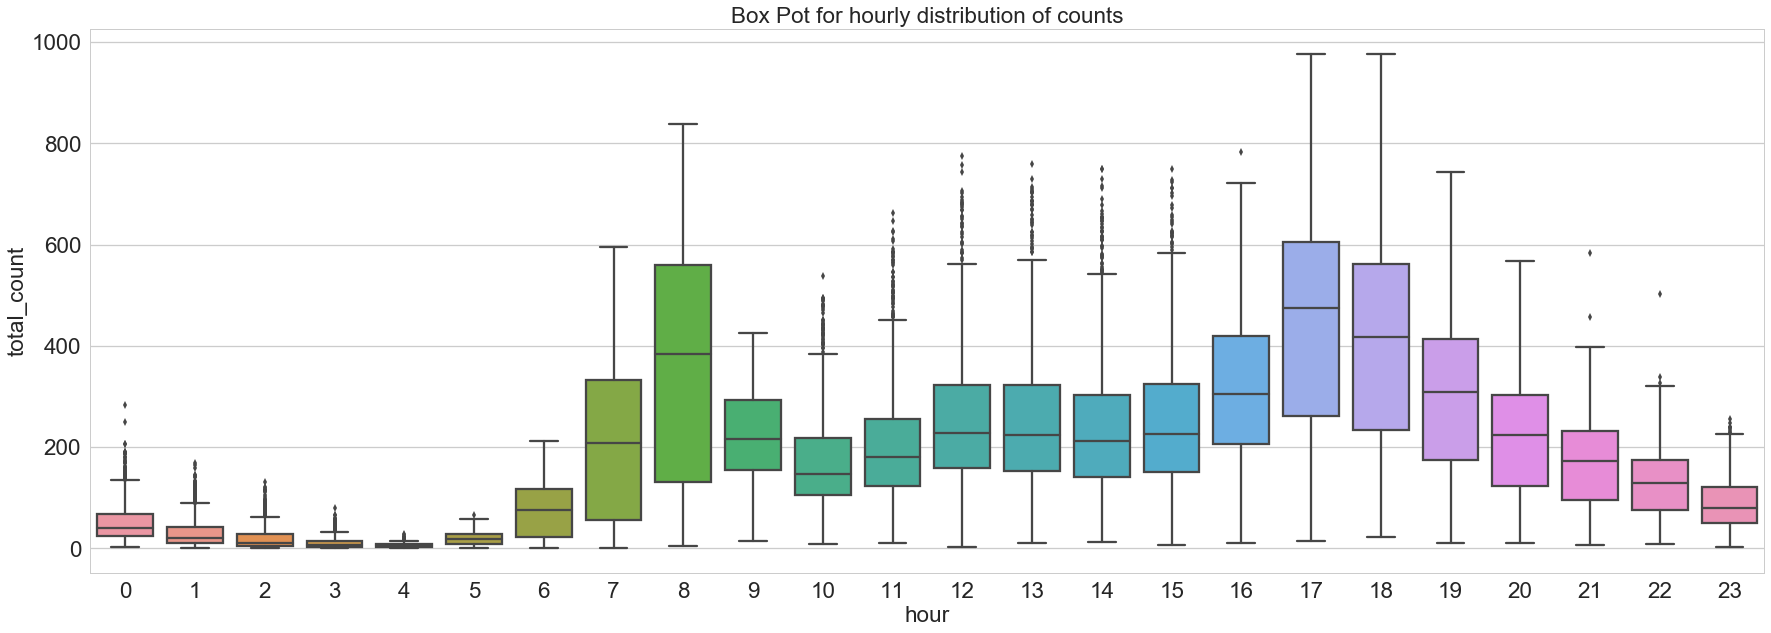

In [33]:
fig,ax = plt.subplots()
sn.boxplot(data=df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

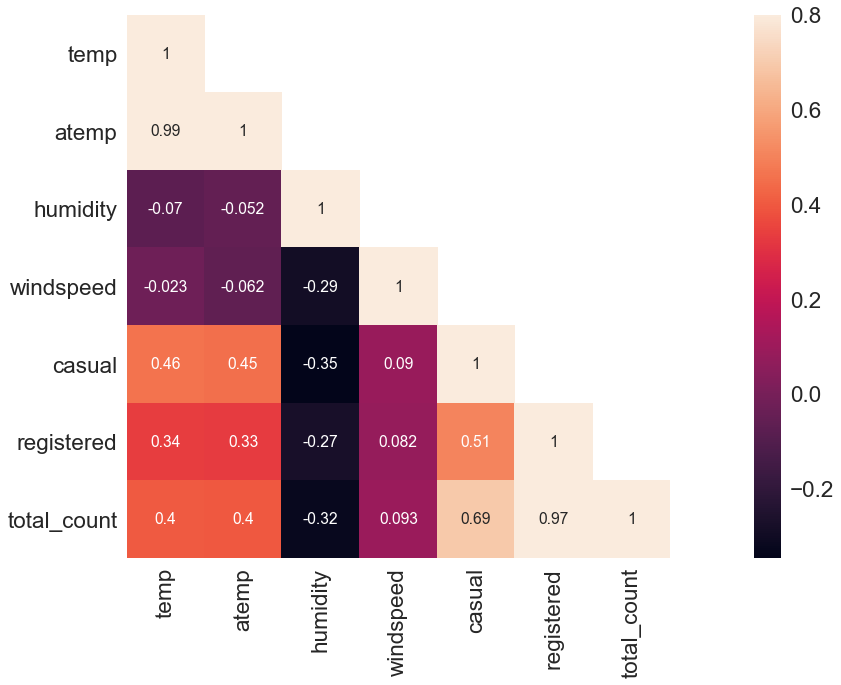

In [36]:
# Correlation

corrMatt = df[["temp","atemp",
                         "humidity","windspeed",
                        "casual","registered",
                        "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
vmax=.8, square=True,annot=True)